In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


In [6]:
df=pd.read_csv('C:\\Users\\UCiK\\OneDrive\\Desktop\\ds course\\datasets\\car details.csv')

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [9]:
df.shape

(8128, 13)

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [11]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
df.mean()

year               2013.804011
selling_price    638271.807702
km_driven         69819.510827
seats                 5.416719
dtype: float64

In [13]:
df.dropna(axis=0,inplace=True)

In [330]:
df['mileage']= df['mileage'].replace('kmpl|km/kg','' , regex=True).astype('float')
df['engine']=df['engine'].replace('CC','',regex=True).astype('float')
df['max_power']=df['max_power'].replace('bhp','' , regex=True).astype('float')

In [331]:
df['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 7906, dtype: float64

In [332]:
a=df['name']
a

0             Maruti Swift Dzire VDI
1       Skoda Rapid 1.5 TDI Ambition
2           Honda City 2017-2020 EXi
3          Hyundai i20 Sportz Diesel
4             Maruti Swift VXI BSIII
                    ...             
8123               Hyundai i20 Magna
8124           Hyundai Verna CRDi SX
8125          Maruti Swift Dzire ZDi
8126                 Tata Indigo CR4
8127                 Tata Indigo CR4
Name: name, Length: 7906, dtype: object

In [333]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
b=lb.fit_transform(a)

b

array([1249, 1546,  375, ..., 1261, 1633, 1633])

In [334]:
np.corrcoef(b,df['selling_price'])

array([[ 1.        , -0.07200173],
       [-0.07200173,  1.        ]])

C:\Users\UCiK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='selling_price'>

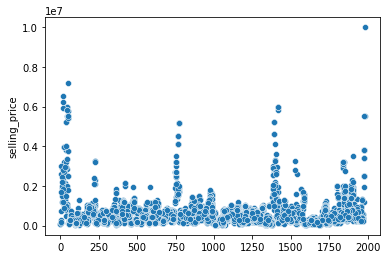

In [335]:
sns.scatterplot(b,df['selling_price'])
##by considring these plot the both are no in related so remove this column 


In [336]:
#years will conver into numarical format 
#converted this stored in the car_age column then we remove year column also
df['car_age'] = 2021-df['year']

In [337]:
dataset=df.drop(columns=['name','year','torque'])

In [338]:
print(dataset['fuel'].value_counts())
print(dataset['seller_type'].value_counts())
print(dataset['transmission'].value_counts())
print(dataset['owner'].value_counts())
print(dataset['seats'].value_counts())

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64
Manual       6865
Automatic    1041
Name: transmission, dtype: int64
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64
5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64


In [339]:
#replace the null values with mode and median
dataset.isnull().sum()

selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
car_age          0
dtype: int64

In [340]:
dt=pd.get_dummies(dataset , drop_first=True )

In [341]:
dt.shape

(7906, 17)

In [342]:
dt.head()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,7,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,7,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,15,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,5.0,11,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,14,0,0,1,1,0,1,0,0,0,0


In [343]:
x=dt.iloc[:,1:]
y=dt.iloc[:,0]

In [344]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X=norm.fit_transform(x)
X

array([[0.06164021, 0.55714286, 0.20939597, ..., 0.        , 0.        ,
        0.        ],
       [0.05083721, 0.50333333, 0.29328859, ..., 1.        , 0.        ,
        0.        ],
       [0.05931015, 0.42142857, 0.29295302, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.05083721, 0.45952381, 0.20939597, ..., 0.        , 0.        ,
        0.        ],
       [0.01059075, 0.56119048, 0.2590604 , ..., 0.        , 0.        ,
        0.        ],
       [0.01059075, 0.56119048, 0.2590604 , ..., 0.        , 0.        ,
        0.        ]])

In [345]:
#splt the data into training and the testing 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, train_size= .8 , random_state= 0)

In [346]:
x_train.shape , x_test.shape ,y_train.shape, y_test.shape

((6324, 16), (1582, 16), (6324,), (1582,))

# multiple linear regression


In [14]:
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

NameError: name 'x_train' is not defined

# support vector machine
linear,
simoid,
rgf,

In [350]:
from sklearn.svm import SVR

regressor= SVR(kernel='linear')
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

-0.06181759069469961

In [352]:
from sklearn.svm import SVR

regressor= SVR(kernel='sigmoid')
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

-0.06321260469869516

In [353]:
from sklearn.svm import SVR

regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

-0.06300054786821763

# Decison tree

In [363]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

0.9544969462685869

# Random forest

In [358]:
from sklearn.ensemble import RandomForestRegressor

regressor= RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

0.9754804489460945

In [357]:
from sklearn.ensemble import GradientBoostingRegressor

regressor= GradientBoostingRegressor()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

0.9612445891373156

In [367]:
from sklearn.ensemble import RandomForestRegressor

regressor= RandomForestRegressor(n_estimators=1000)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

from sklearn.metrics import r2_score 
score =r2_score(y_test,y_pred)
score

0.9753246777754419